FEA on 1D heat distribution

# A First Course in The Finite Element Method, Daryl L. Logan

## 13.1

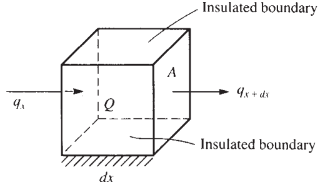

By conservation of energy, we have

$$E_{in} + E_{generated} = \Delta U + E_{out}$$

or

$$q_x A dt + Q A dx dt = \Delta U + q_{x + dx} A dt$$

where
* $E_{in}$ is the energy entering the control volume, in units of joules (J) or kWh
* $\Delta U$ is the change in stored energy, in units of kWh
* $q_x$ is the heat conducted (heat flux) into the control volume at surface edge $x$, in units of $kW/m^2$
* $q_{x + dx}$ is the heat conducted out of the control volume at the surface edge $x + dx$.
* $t$ is time, in $s$.
* $Q$ is the internal heat source (heat generated per unit time per unit volume is positive), in $kW/m^3$ (a heat sink, heat drawn out of the volume, is negative).
* $A$ is the cross-sectional area perpendicular to heat flow $q$, in $m^2$.

By Fourier's law of heat conduction,

$$q_x = -K_{xx} \frac{dT}{dx}$$

where
* $K_{xx}$ is the thermal conductivity in the $x$ direction, in $kW/(m \cdot \;^\circ C)$.
* $T$ is the temperature, in $\;^\circ C)$.
* $dT/dx$ is the temperature gradient, in $\;^\circ C/m$.


Similarly,

$$q_{x + dx} = -K_{xx} \frac{dT}{dx}\bigg|_{x + dx}$$

The gradient is evaluated at $x + dx$.

The change in stored engergy can be expressed by

\begin{align}
\Delta U &= \mbox{specific heat} \times \mbox{mass} \times \mbox{change in temperature}
\\
&= c (\rho A dx) dT
\end{align}

where
* $c$ is the specific heat in $kW \cdot h/(kg \cdot \;^\circ C)$,
* $\rho$ is the mass density in $kg/m^3$.

Work the math,

\begin{align}
q_x A dt + Q A dx dt &= \Delta U + q_{x + dx} A dt
\\
\frac{q_x - q_{x + \partial x}}{\partial x} + Q &= c \rho \frac{\partial T}{\partial t}   
\end{align}

Recall
$\lim_{dx \rightarrow 0} \frac{q_{x + dx} - q_x}{dx} = \frac{d q_x}{d x}$
* $\frac{q_{x + dx} - q_x}{dx} \approx \frac{d q_x}{d x}$

Hence,

\begin{align}
-\frac{\partial q_x}{\partial x} + Q &= c \rho \frac{\partial T}{\partial t}
\\
\frac{\partial \;}{\partial x}\left( K_{xx} \frac{\partial T}{\partial x}
\right) + Q &= c \rho \frac{\partial T}{\partial t}
\end{align}

For steady state ($\frac{dT}{dt} = 0$) and constant thermal conductivity ($K_{xx}$ is constant),

$$ K_{xx} \frac{d^2 T}{d x^2}
 + Q = 0$$

The boundary conditions are of the form
* $T = T_B$ on $S_1$
* $q_x^\ast = - K_{xx} \frac{dT}{dx}$

where
* $T_B$ is a known boundary temperature
* $S_1$ is a surface where the temperature is known
* $q_x^\ast$ is a known heat flux
* $S_2$ is a surface where the heat flux is known.

## Example 13.3

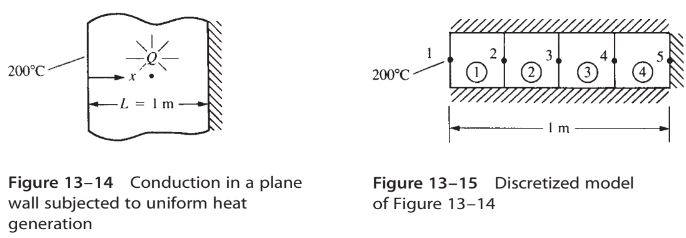

The plane wall is 1 m thick. The left surface of the wall ($x = 0$) is maintained at a constant temperature of $200 \;^\circ C$, and the right surface ($x = L = 1$ m) is insulated.

The thermal conductivity is $K_{xx} = 25 W/(m \cdot \;^\circ C)$ and there is uniform generation of heat inside the wall of $Q = 400 W/m^3$.

Determine the temperature distribution through the wall thickness.

### Solution

Galerkin's weighted residual method

1. Governing equation $k \frac{d^2 T}{d x^2} + Q = 0$ .

2. Weak form: if the governing equation holds, the weak form also holds.

  $$\int_0^L w(x) \left( k \frac{d^2 T}{d x^2} + Q \right) dx = 0$$

  where $w(x)$ is called a shape function.

3. Apply integration by parts: $\int u d v = u v - \int v du$ .

  \begin{align}
  \int_0^L w(x) \left( k \frac{d^2 T}{d x^2} + Q \right) dx &= 0
  \\
  \int_0^L w(x) k \frac{d^2 T}{d x^2} dx+ \int_0^L w(x) Q  dx &= 0
  \\
  \left( w(x) \cdot k \frac{d T}{d x} \right)\bigg|_0^L - \int_0^L k \frac{d T}{d x} \frac{d w(x)}{d x} dx + \int_0^L w(x) Q  dx &= 0
  \end{align}


4. Discretize the subject into elements

5. Account for the boundary conditions

6. Vectorize the relation $[K] \{T\} = \{Q\}$ .

#### Discretization

Here, for this 1d case,
* the element is just a section $d x$;
* the number of elements is chosen to be $N = 4$ (as shown in the picture);
* the shape function $w(x)$ is chosen to be piecewise linear
  * $w(x) = w_i$ for $x_i \le x < x_i + d x$, $i = 1, \ldots, N+1$.
  * $x_1 = 0$ and $x_{N+1} = L$.





##### Term 1

$\int_0^L w(x) Q dx = Q \int_0^L w(x) dx$
  * $\int_0^L w(x) dx$ : area under curve and since we choose $w(x)$ to be piecewise linear, the area is a sum of trazoidal areas:
  
  $Q \int_0^L w(x) dx \approx Q \left( \Delta x (w_1 + w_2)/2 + \Delta x (w_2 + w_3)/2  + \Delta x (w_3 + w_4)/2 + \Delta x (w_4 + w_5)/2 \right)$
  
  * Hence, $Q \int_0^L w(x) dx \approx Q \Delta x \left(  w_1/2  + w_2 + w_3 + w_4 + w_5/2 \right)$


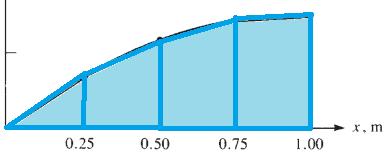

##### Term 2

$w(x) \cdot k \frac{dT}{dx}\bigg|_0^L$
  * $w(x) \cdot k \frac{dT}{dx}\bigg|_0^L = w(x) \cdot k \frac{dT}{dx}\bigg|_{x=L} - w(x) \cdot k \frac{dT}{dx}\bigg|_{x=0}$
  * $w(x) \cdot k \frac{dT}{dx}\bigg|_0^L \approx w_5 \cdot k \frac{dT}{dx}\bigg|_{x=L} - w_1 \cdot k \frac{dT}{dx}\bigg|_{x=0}$


##### Term 3

$\int_0^L \frac{dw}{dx} k \frac{dT}{dx} dx$
  * Recall $\frac{dw}{dx} \approx \frac{w_{i+1} - w_i}{\Delta x}$ and $\frac{dT}{dx} \approx \frac{T_{i+1} - T_i}{\Delta x}$  

Hence,
\begin{align}
\int_0^L \frac{dw}{dx} k \frac{dT}{dx} dx
&\approx \frac{k}{\Delta x} \left( (w_2 - w_1)(T_2 - T_1) + (w_3 - w_2)(T_3 - T_2) + (w_4 - w_3)(T_4 - T_3) + (w_5 - w_4)(T_5 - T_4)\right)
\end{align}

##### Discretized equation

\begin{align}
Q \Delta x \left(  w_1/2  + w_2 + w_3 + w_4 + w_5/2 \right)
+ w_5 \cdot k \frac{dT}{dx}\bigg|_{x=L} - w_1 \cdot k \frac{dT}{dx}\bigg|_{x=0}
\\
- \frac{k}{\Delta x} \left( (w_2 - w_1)(T_2 - T_1) + (w_3 - w_2)(T_3 - T_2) + (w_4 - w_3)(T_4 - T_3) + (w_5 - w_4)(T_5 - T_4)\right) = 0
\end{align}

Rearrange in terms of $w_1, \ldots, w_5$ and we get

\begin{align}
& w_1 \left( \frac{Q \Delta x}{2} - k \frac{dT}{dx}\bigg|_{x=0} - \frac{k}{ \Delta x} (T_1 - T_2) \right)
\\
+ & w_2 \left( Q \Delta x - \frac{k}{\Delta x} (- T_1 + 2 T_2 - T_3) \right)
\\
+ & w_3 \left( Q \Delta x - \frac{k}{\Delta x} (- T_2 + 2 T_3 - T_4) \right)
\\
+ & w_4 \left( Q \Delta x - \frac{k}{\Delta x} (-T_3 + 2 T_4 - T_5) \right)
\\
+ & w_5 \left( \frac{Q \Delta x}{2} + k \frac{dT}{dx}\bigg|_{x=L} - \frac{k}{\Delta x} (- T_4 + T_5) \right) = 0
\end{align}


Since $w(x)$ is arbitrary,
the equation above has to be true for any set of $w_i$'s.

Therefore,

\begin{align}
\frac{Q \Delta x}{2} - k \frac{dT}{dx}\bigg|_{x=0} - \frac{k}{ \Delta x} ( T_1 - T_2) & = 0
\\
Q \Delta x - \frac{k}{\Delta x} (- T_1 + 2 T_2 - T_3) & = 0
\\
Q \Delta x - \frac{k}{\Delta x} (- T_2 + 2 T_3 - T_4) & = 0
\\
Q \Delta x - \frac{k}{\Delta x} (-T_3 + 2 T_4 - T_5) & = 0
\\
\frac{Q \Delta x}{2} - k \frac{dT}{dx}\bigg|_{x=L} - \frac{k}{\Delta x} (- T_4 + T_5) & = 0
\end{align}

##### Vectorize

Rearrange it in terms of $T_i$'s and vectorize it.

\begin{align}
-\frac{k}{\Delta x} \begin{bmatrix}
1 & -1 & 0 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 \\
0 & -1 & 2 & -1 & 0 \\
0 & 0 & -1 & 2 & -1 \\
0 & 0 & 0 & -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4 \\
T_5
\end{bmatrix}
=
\begin{bmatrix}
k \frac{d T}{d x}\bigg|_{x=0} - \frac{Q \Delta x}{2}
\\
- Q \Delta x \\
- Q \Delta x \\
- Q \Delta x \\
-k \frac{d T}{d x}\bigg|_{x=L} - \frac{Q \Delta x}{2}
\end{bmatrix}
\end{align}

Given the boundary conditions,
* $T_1 = 200$
* Insulated at $x=L$, $k\frac{dT}{dx}\bigg|_{x = L} = 0$

* $k = 25 W/(m \cdot \;^\circ C)$.
* $\Delta x = 1/4 = 0.25 m$.
* $Q = 400 W/m^3$.

Hence,
* $\frac{k}{\Delta x} = 100 \; W/(m^2 \;^\circ C)$ .

* $Q \Delta x = 100 \; W/m^2$ .

Recall the governing equation and its root,
* the governing $k\frac{d T}{d x} + Q = 0$
* and its root $q_x A dt + Q A dx dt = \Delta U + q_{x + dx} A dt$
  * $\Delta U = c (\rho A dx) dT$

In both, we have removed $A$.

Anyhow, the final equations become:

\begin{align}
-100 \begin{bmatrix}
1 & -1 & 0 & 0 & 0 \\
-1 & 2 & -1 & 0 & 0 \\
0 & -1 & 2 & -1 & 0 \\
0 & 0 & -1 & 2 & -1 \\
0 & 0 & 0 & -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4 \\
T_5
\end{bmatrix}
=
\begin{bmatrix}
k \frac{d T}{d x}\bigg|_{x=0} - 50
\\
- 100 \\
- 100 \\
- 100 \\
- 50
\end{bmatrix}
\end{align}

Since we do not have $k \frac{d T}{d x}\bigg|_{x=0}$ yet
and we know $T_1$,
then we can remove the first equation and put $T_1$'s value in.

\begin{align}
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
0 & 2 & -1 & 0 & 0 \\
0 & -1 & 2 & -1 & 0 \\
0 & 0 & -1 & 2 & -1 \\
0 & 0 & 0 & -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
T_1 \\
T_2 \\
T_3 \\
T_4 \\
T_5
\end{bmatrix}
=
\begin{bmatrix}
200 \\
1 + 1(200)\\
1 \\
1 \\
0.5
\end{bmatrix}
\end{align}

Solve for $T_2, \ldots, T_5$ from

\begin{align}
\begin{bmatrix}
2 & -1 & 0 & 0 \\
-1 & 2 & -1 & 0 \\
0 & -1 & 2 & -1 \\
0 & 0 & -1 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
T_2 \\
T_3 \\
T_4 \\
T_5
\end{bmatrix}
=
\begin{bmatrix}
201\\
1 \\
1 \\
0.5
\end{bmatrix}
\end{align}

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
Kmat = np.array([[2, -1, 0, 0],
                 [-1, 2, -1, 0],
                 [0, -1, 2, -1],
                 [0, 0, -1, 1]])

Qmat = np.array([201, 1, 1, 0.5]).reshape((-1,1))

Tmat = np.linalg.solve(Kmat, Qmat)

print(Tmat)

[[203.5]
 [206. ]
 [207.5]
 [208. ]]


In [7]:
len(Tmat)

4

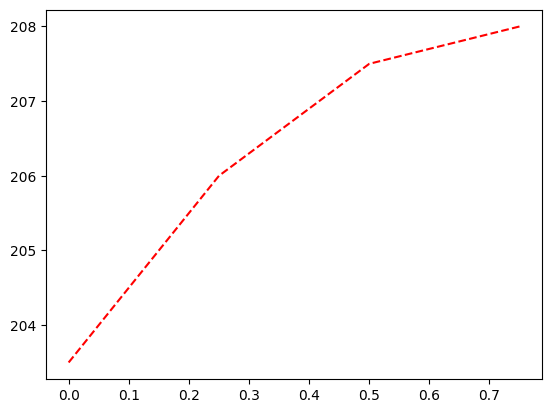

In [8]:
xs = [0.25*i for i in range(len(Tmat))]

plt.plot(xs, Tmat, 'r--')


#### Discussion

Why do we estimate
$\int_0^L w(x) Q  dx$ with trazoidal area,
but $\int_0^L k \frac{d T}{d x} \frac{d w(x)}{d x} dx$ with simple rectangular area?


* Recall $w(x)$ is piecewise linear.
  * Its value $w(x)$ is better estimated with trazoidal.
  * But derivative of linear is a constant, i.e., $\frac{d w(x)}{d x}$ is constant over the section.
    * Also, the way I use trazoidal:
       * $a(0) \equiv a_1 \approx \frac{(w_2 - w_1)(T_2 - T_1)}{\Delta x^2}$
       * $a(dx) \equiv a_2 \approx \frac{(w_3 - w_2)(T_3 - T_2)}{\Delta x^2}$     
       * ...
       * $\frac{a_1 + a_2}{2} \Delta x$, ...
    * This is like averaging the derivative of 2 sections.
    * With piecewise linear, derivative is constant over a section. Thus, using the next section derivative to average with is likely to make the approximation worse.
      * However, if the temperature changes fast, this may help! as it catches the change better.


### Exact solution

\begin{align}
k \frac{d^2 T}{d x^2} + Q &= 0
\\
\ddot{T} = -\frac{Q}{k}
\end{align}

Let
* $T(x) = e^{\lambda x}$
* $\dot{T}(x) = \lambda e^{\lambda x}$
* $\ddot{T}(x) = \lambda^2 e^{\lambda x}$

1. Homogeneous: $\ddot{T} = 0$

$\lambda = 0$

* $T_1 = e^{0 x} = 1$

* $T_2 = x$

$T_h(x) = c_1 + c_2 x$

2. Particular: $\ddot{T} = -\frac{Q}{k}$

* Basic rule: $T_p(t) = K$
* Modification rule: $T_p(t) = K x^2$

Hence
* $T_p = K x^2$
* $\dot{T}_p = 2 K x$
* $\ddot{T}_p = 2 K$

* $2 K = - \frac{Q}{k}$
* $K = -\frac{Q}{2 k}$


3. Boundary conditions

* $T(x) = c_1 + c_2 x - \frac{Q}{2 k} x^2$
* $T(0) = T_0$
* $\dot{T}(L) = 0$

Hence,
\begin{align}
c_1 &= T_0
\\
c_2 - \frac{Q}{k} L &= 0
\end{align}

* $c_1 = T_0$
* $c_2 = \frac{Q}{k} L$

$$T(x) = T_0 + \frac{Q}{k} L x - \frac{Q}{2 k} x^2$$

In [4]:
k = 25
Q = 400
To = 200
L = 1

def temp(x, k, Q, To, L):
    Qk = Q/k
    return To + Qk * L * x - Qk/2 * x**2

In [14]:
Tmat = np.r_[[[To]], Tmat]
Tmat

array([[200. ],
       [203.5],
       [206. ],
       [207.5],
       [208. ]])

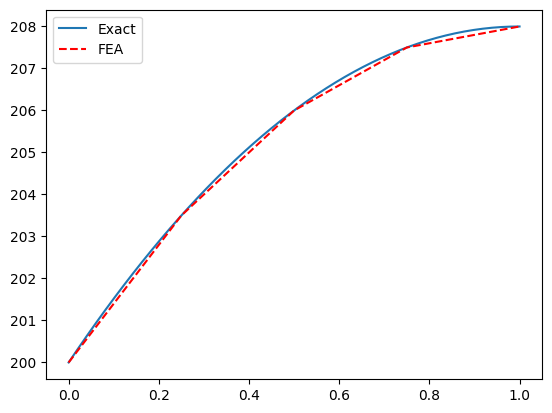

In [17]:
xs = np.linspace(0, 1, 50)
plt.plot(xs, temp(xs, k, Q, To, L))

xs = [0.25*i for i in range(len(Tmat))]
plt.plot(xs, Tmat, 'r--')

plt.legend(['Exact', 'FEA'])

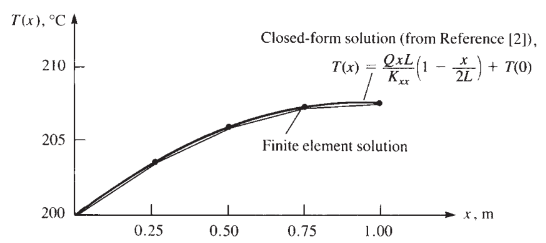

# EdX: Cornell's Introduction to Simulation

### 1-D Heat distribution on an isotropic iron bar

* Given $k \frac{d^2 T}{d x^2} + Q = 0$ for $0 \leq x \leq L$, solve for $T(x)$.
* Boundary conditions
  * $T(0) = T_0$
  * $q(L) = q_L = - k \frac{dT}{dx}|_{x=L}$
* $T$ : temperature, $q$ heat flow per unit area, "heat flux"

My note: $q = - k \frac{dT}{dx}$ means:
  * along $x$, negative heat flux $q < 0$ takes heat in and temperature rises.
  * along $x$, positive heat flux $q > 0$ takes heat out and temperature gets lower.




# FEA

To solve the problem,
* Direct method: exact solution -> Calculus
* Galerkin: $[K] \{ T \} = \{ Q \}$



## Derive a weak form
* If $k \frac{d^2 T}{d x^2} + Q = 0$,
  * then $\int_0^L w(x) \cdot \left(k \frac{d^2 T}{d x^2} + Q\right) dx = 0$ also holds for an arbitrary function $w(x)$.
* Let $w(x)$ be an arbitrary piecewise polynomial function.

With integration by parts,
$\int_0^L w(x) \cdot \left(k \frac{d^2 T}{d x^2} + Q\right) dx = 0$
can be written as

$$w(x) \cdot k \frac{dT}{dx}|_0^L - \int_0^L \frac{dw}{dx} k \frac{dT}{dx} dx + \int_0^L w(x) Q dx  = 0$$


## Discretize the calculation

Discretize $x \in [0, L]$ into $M$ parts, e.g., 3 parts (4 nodes: 1, 2, 3, 4)

Consider each term

* $w(x) \cdot k \frac{dT}{dx}|_0^L$
  * $w(x) \cdot k \frac{dT}{dx}|_0^L = w(x) \cdot k \frac{dT}{dx}|^{x=L} - w(x) \cdot k \frac{dT}{dx}|^{x=0})$
  * $w(x) \cdot k \frac{dT}{dx}|_0^L \approx w_4 \cdot k \frac{dT}{dx}|^{x=L} - w_1 \cdot k \frac{dT}{dx}|^{x=0}$
* $\int_0^L \frac{dw}{dx} k \frac{dT}{dx} dx$
  * Recall $\frac{dw}{dx} = \frac{w_{i+1} - w_i}{\Delta x}$ and $\frac{dT}{dx} = \frac{T_{i+1} - T_i}{\Delta x}$
  * Hence (the area under curve), $\int_0^L \frac{dw}{dx} k \frac{dT}{dx} dx \approx \frac{k}{\Delta x} \left( (w_2 - w_1)(T_2 - T_1) + (w_3 - w_2)(T_3 - T_2) + (w_4 - w_3)(T_4 - T_3) \right)$
* $\int_0^L w(x) Q dx = Q \int_0^L w(x) dx$
  * $\int_0^L w(x) dx$ : area under curve and since we choose $w(x)$ to be piecewise linear, the area is a sum of trazoidal areas: $Q \int_0^L w(x) dx \approx Q \left( \Delta x (w_1 + w_2)/2 + \Delta x (w_2 + w_3)/2  + \Delta x (w_3 + w_4)/2 \right)$
  * Hence, $Q \int_0^L w(x) dx \approx Q \Delta x \left(  w_1/2  + w_2 + w_3 + w_4/2 \right)$


Substitute each term with its discrete approximation

$$w_4 \cdot k \frac{dT}{dx}|^{x=L} - w_1 \cdot k \frac{dT}{dx}|^{x=0} - \frac{k}{\Delta x} \left( (w_2 - w_1)(T_2 - T_1) + (w_3 - w_2)(T_3 - T_2) + (w_4 - w_3)(T_4 - T_3) \right) + Q \Delta x \left(  w_1/2  + w_2 + w_3 + w_4/2 \right) = 0$$

Then, rearrange to

$w_1 \cdot (-\frac{k}{\Delta x} T_1 + \frac{k}{\Delta x} T_2 + \frac{Q \Delta x}{2} - k \frac{dT}{dx}|^{x=0})$

$+ w_2 \cdot (\frac{k}{\Delta x} T_1 - 2 \frac{k}{\Delta x} T_2 + \frac{k}{\Delta x} T_3 + Q \Delta x)$

$+ w_3 \cdot (\frac{k}{\Delta x} T_2 - 2 \frac{k}{\Delta x} T_3 + \frac{k}{\Delta x} T_4 + Q \Delta x)$

$+ w_4 \cdot (\frac{k}{\Delta x} T_3 - \frac{k}{\Delta x} T_4 + \frac{Q \Delta x}{2} + k \frac{dT}{dx}|^{x=L}) = 0$


Since this has to work for any arbitrary $w(x)$ (i.e., $w_1, ..., w_n$), therefore

$-\frac{k}{\Delta x} T_1 + \frac{k}{\Delta x} T_2 + \frac{Q \Delta x}{2} - k \frac{dT}{dx}|^{x=0} = 0$

$\frac{k}{\Delta x} T_1 - 2 \frac{k}{\Delta x} T_2 + \frac{k}{\Delta x} T_3 + Q \Delta x = 0$

$\frac{k}{\Delta x} T_2 - 2 \frac{k}{\Delta x} T_3 + \frac{k}{\Delta x} T_4 + Q \Delta x = 0$

$\frac{k}{\Delta x} T_3 - \frac{k}{\Delta x} T_4 + \frac{Q \Delta x}{2} + k \frac{dT}{dx}|^{x=L} = 0$


Recall the boundary conditions
* $k \frac{dT}{dx}|^{x=L} = -q_L$ (known)
* $T_1 = T_0$ (known)


With $T_1$ known, we can form a system of equations to solve for 3 unknown variables, $T_2, T_3, T_4$.



$\begin{bmatrix} -2 \frac{k}{\Delta x} & \frac{k}{\Delta x} & 0 \\ \frac{k}{\Delta x} & -2 \frac{k}{\Delta x} & \frac{k}{\Delta x} \\ 0 & \frac{k}{\Delta x} &  -\frac{k}{\Delta x}
\end{bmatrix}
\cdot \begin{bmatrix} T_2 \\ T_3 \\ T_4 \end{bmatrix}$
$=$
$\begin{bmatrix} -\frac{k}{\Delta x} T_0 -Q \Delta x \\
-Q \Delta x \\
- \frac{Q \Delta x}{2} + q_L
\end{bmatrix}$


# Code

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
k = 1.2
Q = 200 # Watt

T0 = 50 # C
qL = 18 # C/m

Dx = 0.02 # m

$[K] \{T\} = \{Q\}$

In [ ]:
kx = k/Dx
Qx = Q*Dx

Kmat = np.array([[-2*kx, kx, 0],
                 [kx, -2*kx, kx],
                 [0, kx, -kx]])
Qmat = np.array([[-kx * T0 - Qx],
                 [-Qx],
                 [-Qx + qL]])

In [ ]:
Tmat = np.linalg.solve(Kmat, Qmat)

In [ ]:
Tmat

array([[49.9       ],
       [49.73333333],
       [49.5       ]])

In [ ]:
T2, T3, T4 = Tmat.reshape(-1,)

Once we have all $T_1, ..., T_4$ known, we can solve for $q_0 \equiv -k \frac{dT}{dx}|^{x=0}$.


---



$-\frac{k}{\Delta x} T_1 + \frac{k}{\Delta x} T_2 + \frac{Q \Delta x}{2} = k \frac{dT}{dx}|^{x=0}$

or

$q_0 = \frac{k}{\Delta x} T_1 - \frac{k}{\Delta x} T_2 - \frac{Q \Delta x}{2}$


In [ ]:
T1 = T0
q0 = kx * T1 - kx * T2 - Qx/2

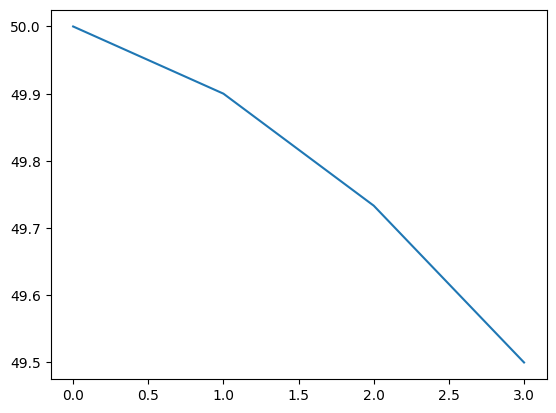

In [ ]:
plt.plot([0, 1, 2, 3], [T1, T2, T3, T4])

Recall
* $q_0 \equiv -k \frac{dT}{dx}|^{x=0}$

* $q_L \equiv -k \frac{dT}{dx}|^{x=L}$




* When $q_0 > 0 $ , $T$ declines as moving inside: $x = 0$ to $0^+$.

* When $q_L > 0 $, $T$ declines as moving outside: $x = L$ to $L^+$
  * or, $T$ increases as moving inside.


# See the interaction

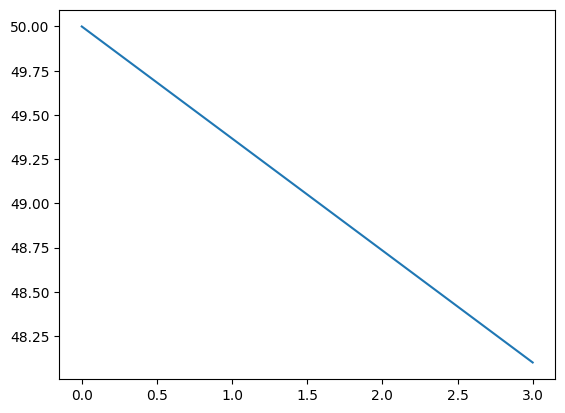

In [ ]:
k = 1.2
Q = 0 # Watt

T0 = 50 # C
qL = 38 # C/m

Dx = 0.02 # m

kx = k/Dx
Qx = Q*Dx

Kmat = np.array([[-2*kx, kx, 0],
                 [kx, -2*kx, kx],
                 [0, kx, -kx]])
Qmat = np.array([[-kx * T0 - Qx],
                 [-Qx],
                 [-Qx + qL]])

Tmat = np.linalg.solve(Kmat, Qmat)

T2, T3, T4 = Tmat.reshape(-1,)
T1 = T0
q0 = kx * T1 - kx * T2 - Qx/2
plt.plot([0, 1, 2, 3], [T1, T2, T3, T4])

# Function ```heat_1d```

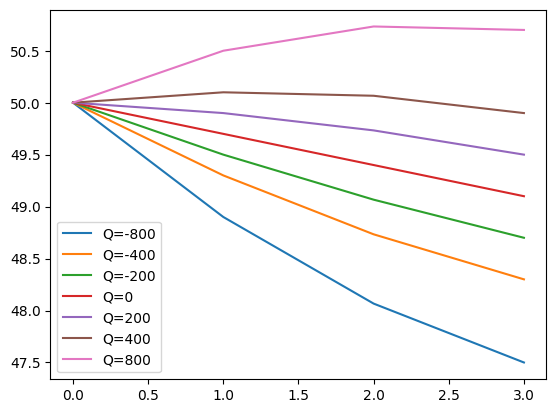

In [ ]:
def heat_1d(k, Q, T0, qL, dx):
    kx = k/dx
    Qx = Q*dx

    Kmat = np.array([[-2*kx, kx, 0],
                    [kx, -2*kx, kx],
                    [0, kx, -kx]])
    Qmat = np.array([[-kx * T0 - Qx],
                    [-Qx],
                    [-Qx + qL]])

    Tmat = np.linalg.solve(Kmat, Qmat)

    T2, T3, T4 = Tmat.reshape(-1,)
    T1 = T0
    q0 = kx * T1 - kx * T2 - Qx/2
    return T1, T2, T3, T4, q0


k = 1.2
Q = 200 # Watt
T0 = 50 # C
qL = 18 # C/m
Dx = 0.02 # m

Qs = [-800, -400, -200, 0, 200, 400, 800]

for Q in Qs:
    T1, T2, T3, T4, q0 = heat_1d(k, Q, T0, qL, Dx)
    plt.plot([0, 1, 2, 3], [T1, T2, T3, T4])

plt.legend(["Q={}".format(Q) for Q in Qs])

Recall

* $k \frac{d^2 T}{d x^2} + Q = 0$

* $Q = -\frac{\partial T(x,t)}{\partial t}$
  * Q : heat flowing out over time
  * Since we do not plot it over time, this point we cannot discuss.


But, $k \frac{d^2 T}{d x^2} + Q = 0$
or $Q = -k \frac{d^2 T}{d x^2}$
 implies $Q$ controls the curvature of temperature-distance plot.
* $Q > 0$, it should bend down!
* $Q < 0$, it should bend up!


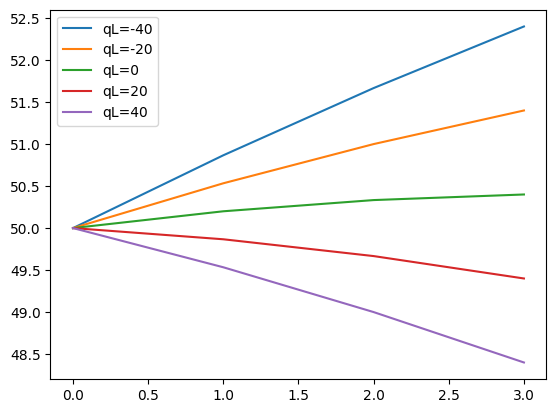

In [ ]:
k = 1.2
Q = 200 # Watt
T0 = 50 # C
qL = 18 # C/m
Dx = 0.02 # m

qLs = [-40, -20, 0, 20, 40]

for qL in qLs:
    T1, T2, T3, T4, q0 = heat_1d(k, Q, T0, qL, Dx)
    plt.plot([0, 1, 2, 3], [T1, T2, T3, T4])

plt.legend(["qL={}".format(qL) for qL in qLs])

$qL > 0$ "temperature decreases as $x$ increases at the $x = L$ location."

# Reaction

> "Energy is conserved in aggregated."

Given $Q = -k \frac{d^2 T}{d x^2}$
and $q_{x_0} = -k (\frac{d T}{d x})_{x=x_0}$,

$\int_0^L Q dx = q_L - q_0$ .

Hence,

$$Q \cdot \Delta x \cdot n \approx q_L - q_0$$

where $n$ is a number of sections between $x=0$ to $x=L$.





Recall that $q_L$ and $q_0$ are only the approximation of the derivatives.

These might be the source of error: reaction $\neq 0$.

Reaction= 6.0 - 7.000000000000007 = -1.0000
Reaction= 6.0 - 7.000000000000011 = -1.0000
Reaction= 6.0 - 7.000000000000002 = -1.0000
Reaction= 6.0 - 6.9999999999999964 = -1.0000
Reaction= 6.0 - 6.999999999999986 = -1.0000


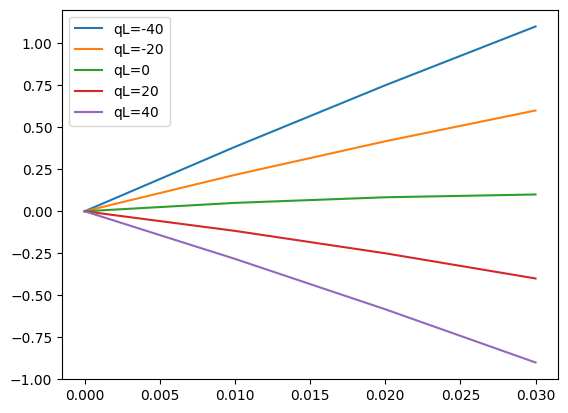

In [ ]:
k = 1.2
Q = 200 # Watt
T0 = 0 # C
qL = 18 # C/m
Dx = 0.01 # m

qLs = [-40, -20, 0, 20, 40]

for qL in qLs:
    T1, T2, T3, T4, q0 = heat_1d(k, Q, T0, qL, Dx)
    plt.plot([i*Dx for i in range(4)], [T1, T2, T3, T4])

    LHS = Q*3*Dx   # 4 nodes = 3 sections for 1D case
    RHS = qL - q0
    print('Reaction= {} - {} = {:.4f}'.format(LHS, RHS, LHS - RHS))

plt.legend(["qL={}".format(qL) for qL in qLs])



# Check against exact solution

$k \frac{d^2 T}{d x^2} + Q = 0$


Standard form $a_2 \frac{d^2 T}{d x^2} + a_1 \frac{d T}{d x} + a_0 T = f(x)$
* When $a_1^2 > 4 a_0 a_2$, $T_h = A_1 e^{s_1 x} + A_2 e^{s_2 x}$
  * where $s_1, s_2 = \frac{-a_1 \pm \sqrt{a_1^2 - 4 a_0 a_2}}{2 a_2}$
* When $a_1^2 = 4 a_0 a_2$, $T_h = A_1 e^{s x} + A_2 x e^{s x}$
  * where $s = - \frac{a_1}{2 a_2}$
* When $a_1^2 < 4 a_0 a_2$, $x_h = e^{-\alpha x} \left( A_1 \cos(\beta x) + A_2 \sin(\beta x) \right)$
  * where $\alpha = \frac{a_1}{2 a_2}$ and $\beta = \frac{\sqrt{4 a_0 a_2 - a_1^2}}{2 a_2}$

And, if $f(x) = K$ and $a_0 = 0$ and $a_1 = 0$, then

$$T_p = B_2 x^2 + B_1 x + B_0$$.

Since $a_1 = 0$ and $a_0 = 0$, this makes $a_1^2 = 4 a_0 a_2$
and

$$T_h = A_1 e^{s x} + A_2 x e^{s x}$$

And, with $s = - \frac{0}{2 k} = 0$,

$$T_h = A_1 + A_2 x$$

Hence,

$$ T = T_h + T_p = A x^2 + B x + C$$

With
* $-k \frac{d^2 T(x)}{d x^2} = Q$ for every $x$,
* $T(x = 0) = T_0$, and
* $-k \frac{d T(x)}{d x}|^{x = L} = q_L$


Hence,
* $-2 k A = Q$, then $A = - \frac{Q}{2 k}$
* $T(0) = C = T_0$
* $-k(2 A L + B) = q_L$
  * Substitute $A$, we have
  $Q L - k B = q_L$ and $B = \frac{Q \cdot L - q_L}{k}$


In [ ]:
def exact_heat_1d(x, Q, k, L, qL, T0):
    A = - Q/(2*k)
    B = (Q*L - qL)/k
    C = T0

    Tx = A*x**2 + B*x + C
    return Tx

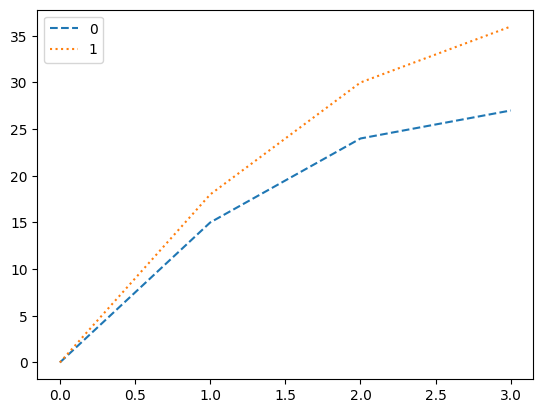

In [ ]:
k = 1
Q = 0 # Watt
T0 = 0 # C
qL = 0 # C/m
Dx = 1 # m
N = 3
L = N * Dx

xs = Dx * np.arange(N+1)

# Qs = np.array([-800, -200, 0, 200, 800])
Qs = np.array([6])
for Q in Qs:
    eT = exact_heat_1d(xs, Q, k, L, qL, T0)
    # plt.plot(xs, eT, 'kx--')
    plt.plot(xs, eT, '--')

    T1, T2, T3, T4, q0 = heat_1d(k, Q, T0, qL, Dx)
    # plt.plot(xs, [T1, T2, T3, T4], 'ro:')
    plt.plot(xs, [T1, T2, T3, T4], ':')


plt.legend(['{}'.format(i) for i in range(2*len(Qs))])

This confuses me.

I'll take a BREAK HERE!!!

Since $a_1 = 0$ and $a_0 = 0$, this makes $a_1^2 = 4 a_0 a_2$
and

$$T = A_1 e^{s x} + A_2 x e^{s x} + B$$

where

$$s = - \frac{0}{2 k} = 0$$

That is, $T = A x + C$

With initial condition,

* $T(x = 0) = T_0$, then $C = T_0$

* $-k \frac{d T}{d x}|^{x = L} = q_L$, then $A = -q_L/k$

Therefor,

$$T(x) = -\frac{q_L}{k} x + T_0$$

In [ ]:
def exact_heat1d(x, k, qL, T0):
  Tx = - qL/k * x + T0
  return Tx

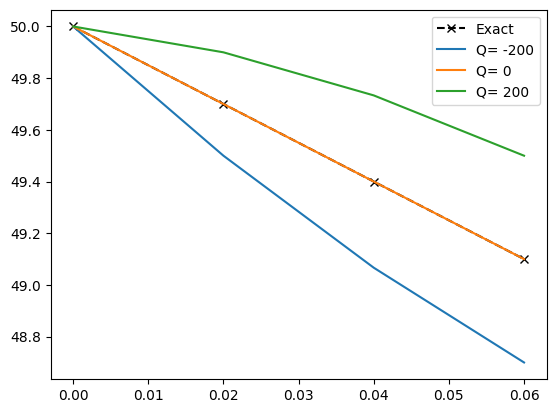

In [ ]:
k = 1.2
Q = 0 # Watt
T0 = 50 # C
qL = 18 # C/m
Dx = 0.02 # m

xs = Dx * np.arange(4)
eT = exact_heat1d(xs, k, qL, T0)
plt.plot(xs, eT, 'kx--')

Qs = np.array([-200, 0, 200])
for Q in Qs:
    T1, T2, T3, T4, q0 = heat_1d(k, Q, T0, qL, Dx)
    plt.plot(xs, [T1, T2, T3, T4])

plt.legend(['Exact'] + ['Q= {}'.format(Q) for Q in Qs])

# To improve

* Increase # elements
* Increase the order of the polynomial (more nodes within an element)

## Effect of having more elements

## Effect of having higher-order polynomial

# Appendix


## Heat

E.g., What quantity of heat is required to raise the temperature of 500 g of water from $20$ C to $90$ C?

The specific heat capacity of water is $4.18$ J/(g C).

\begin{align}
Q &= m C \Delta T
\\
&= (500) \cdot (4.18) \cdot (90 - 20)
\end{align}

That is, $Q = 146300$ J.


In [ ]:
500 * 4.18 * 70

146300.0

## Heat flux

> "a flow of energy per unit area per unit time."

Heat flux $q$ has a unit in $W/m^2$.

# End